In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

sys.path.append('../..')
from sklearn.tree import DecisionTreeRegressor
from copy import deepcopy
import imodels
from viz import *
import plotly.graph_objects as go
from tqdm import tqdm

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# look at model example

In [23]:
def plot_sim(n=50, std=1, reg_param=0, show=True, linear_data=False, return_curves=False):
    np.random.seed(13)

    if linear_data:
        def gt_func(X):
            return X
    else:
        def gt_func(X):
            return +1 * (X < 2) * (X < 1) + \
                   -0 * (X < 2) * (X > 1) + \
                   +1 * (X >= 2) * (X < 3) + \
                   +0 * (X >= 2) * (X > 3)

    # data to fit
    X = np.random.uniform(0, 4, n)
    X = np.sort(X)
    y = gt_func(X) + np.random.normal(0, 1, n) * std


    # data to plot
    X_tile = np.linspace(0, 4, 400)
    y_tile = gt_func(X_tile)

    m1 = DecisionTreeRegressor(random_state=1)  #, max_leaf_nodes=15)
    m1.fit(X.reshape(-1, 1), y)
    y_pred_dt = m1.predict(X_tile.reshape(-1, 1))

    mshrunk = imodels.ShrunkTreeRegressor(deepcopy(m1), reg_param=reg_param)
    y_pred_shrunk = mshrunk.predict(X_tile.reshape(-1, 1))
    
    
    plt.plot(X, y, 'o', color='black', ms=4, alpha=0.5, markeredgewidth=0)    
    plt.plot(X_tile, y_tile, label='Groundtruth', color='black', lw=3)    
    plt.plot(X_tile, y_pred_dt, '-', label='CART', color=cb, alpha=0.5, lw=4)
    plt.plot(X_tile, y_pred_shrunk, label='Shrunk', color='#ff4b33', alpha=0.5, lw=4)
    plt.xlabel('X')
    plt.ylabel('Y')
    dvu.line_legend(adjust_text_labels=False)
    if show:
        plt.show()
    elif show == 'save':
        plt.savefig(f'gif/{reg_param}.svg')
    else:
        plt.close()

    if return_curves:
        return X, y, X_tile, y_tile, y_pred_dt, y_pred_shrunk

#     print('dt', export_text(m1, feature_names=['X']))
#     print('dt', export_text(mshrunk.estimator_, feature_names=['X']))

# plot_sim(n=100)



shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrinking 100
shrink

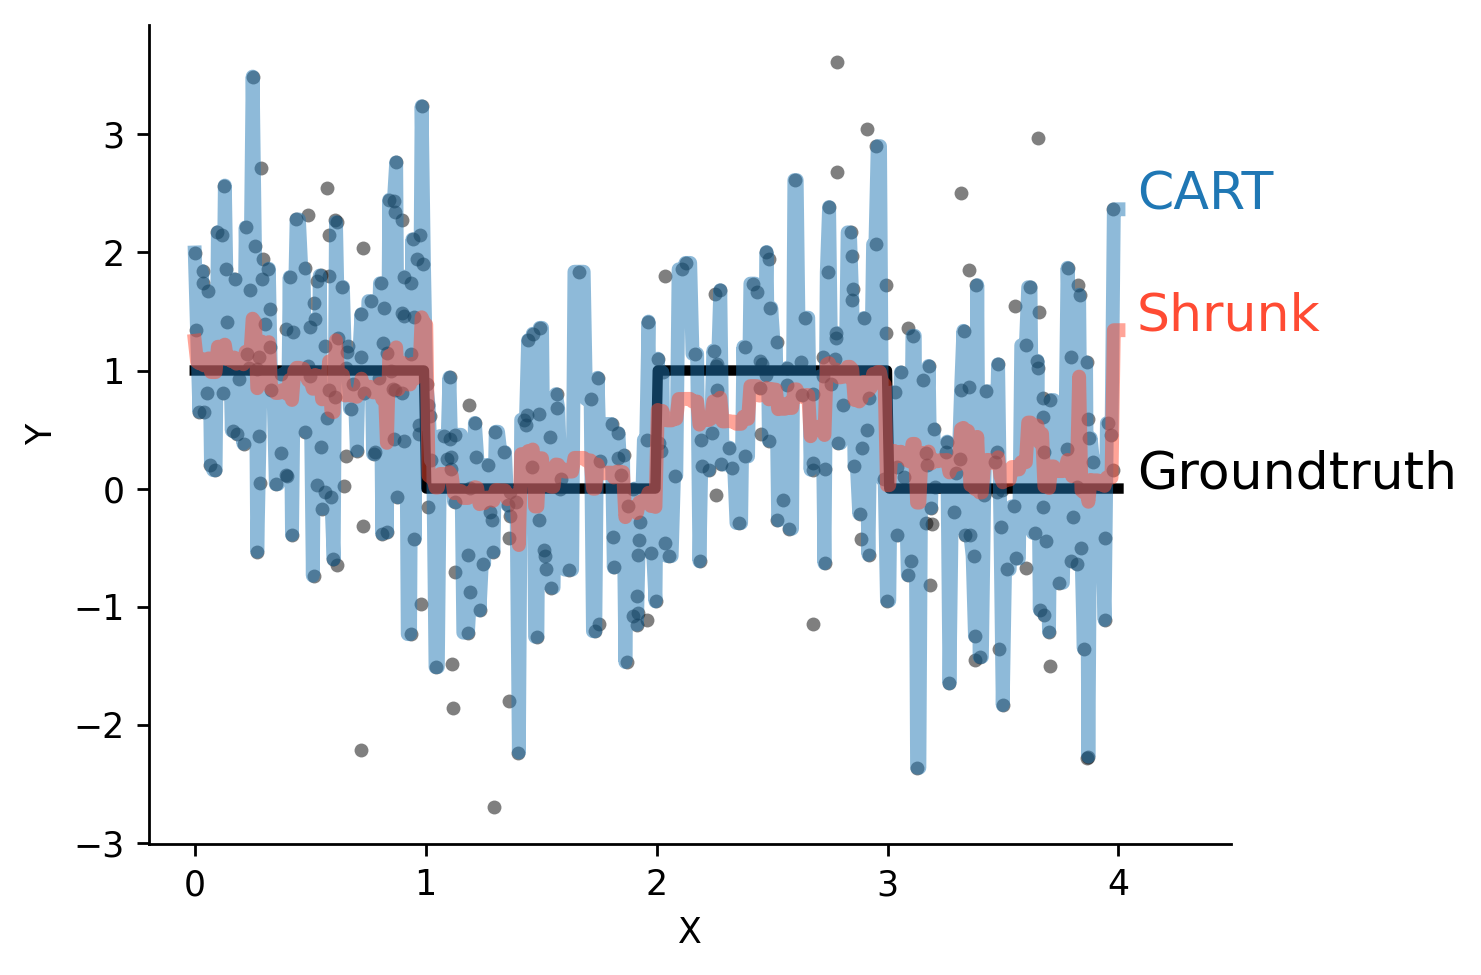

<Figure size 1500x1000 with 0 Axes>

In [21]:
plot_sim(n=400, std=1, reg_param=100)
plt.savefig('intro_indicators.pdf')

In [ ]:
plot_sim(n=400, std=1, reg_param=50, linear_data=True)
plt.savefig('intro_linear.pdf')

# static interactive plotly plots
Note: requires installing plotly.

In [73]:
# generate data
n = 80
s = 0.6
linear_data = True
fname_out = 'demo_linear.js'

X, y, X_tile, y_tile, y_pred_dt, y_pred_shrunk = plot_sim(n=n, std=s, reg_param=0, linear_data=linear_data, 
                                                          show=False, return_curves=True)
# assert np.array_equal(y_pred_dt, y_pred_shrunk)
print(y_pred_dt[:30] - y_pred_shrunk[:30])
# print()
print(np.array_equal(y_pred_dt[:30], y_pred_shrunk[:30]))

# permanent curves to add
permanent_curves = [
    dict(name='Raw data points', x=X, y=y, mode='markers', visible=True),
    dict(name='Groundtruth', x=X_tile, y=y_tile, line=dict(color='black'), visible=True),
    dict(name='CART predictions', x=X_tile, y=y_pred_dt, line=dict(color='gray'), visible=True),
]

# active curve params
vary_curve_params = dict(name='Shrunk predictions', line=None, marker=dict(), visible=False)
vary_curves = []
vary_vals = [0, 1, 10, 30, 100] # what values to generate the curves for
for val in vary_vals:
    _, _, X_tile, _, _, y_shrunk = plot_sim(n=n, std=s, reg_param=val,
                                            show=False, linear_data=linear_data, return_curves=True)
    vary_curves.append(dict(x=X_tile, y=y_shrunk, **vary_curve_params))
    
    
active_curve = 2

[-1.38777878e-17 -1.38777878e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17
 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17
 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17
 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17 -2.77555756e-17
 -2.77555756e-17  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
False


In [74]:
# def create_slider_fig_static(permanent_curves, vary_curve_params, vary_curev_)
# Create figure
fig = go.Figure()
fig.layout.template = 'plotly_white'

# plot the permanent curves
for curve in permanent_curves:
    fig.add_trace(go.Scatter(**curve))

# Add traces, one for each slider step
for vary_curve in vary_curves:
    fig.add_trace(go.Scatter(**vary_curve))

# Create and add slider
steps = []
OFFSET = len(permanent_curves)
for i in range(len(fig.data) - OFFSET):  # remember offset
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)}],
#               {"title": "Reg-param: " + str(VALS[i])}],  # layout attribute
        label=str(vary_vals[i])
    )
    step["args"][0]["visible"][0:OFFSET] = [True] * OFFSET  # permanent curves    
    step["args"][0]["visible"][i + OFFSET] = True  # set i'th trace to "visible"
    steps.append(step)

fig.data[active_curve + OFFSET].visible = True # Make active_curve visible
sliders = [dict(
    active=active_curve,
    currentvalue={"prefix": "Regularization parameter: "},
    pad={"t": 50},
    steps=steps,
)]
fig.update_layout(sliders=sliders)

fig.write_html("demo.html", full_html=False, include_plotlyjs="cdn") # , 
s = (open('demo.html', 'r').read())
div_start = s.index('<div id=')
div_end = div_start + s[div_start:].index('</div>') + len('</div>')
print(s[div_start:div_end])

js_start = s.rfind('<script type="text/javascript">') + len('<script type="text/javascript">')
js_end = js_start + s[js_start:].index('</script>')
with open(fname_out, 'w') as f:
    f.write(s[js_start:js_end])
os.remove('demo.html')
fig.show()

<div id="71b83a4f-ec87-43bd-8d9d-db0eb720e0a8" class="plotly-graph-div" style="height:100%; width:100%;"></div>


<div id="92934727-ec2b-47eb-a32c-9f137d23d92c" class="plotly-graph-div" style="height:100%; width:100%;"></div>


# ipywidget

In [ ]:
from ipywidgets.widgets import *

interactive_plot = interactive(plot_sim,
                               n=IntSlider(value=50, min=20, max=300, step=10),
                               std=FloatSlider(value=0.5, min=0.01, max=3),
                               reg_param=(0, 150))
output = interactive_plot.children[-1]
output.layout.height = '800px'
interactive_plot  # note this can't be exported to static

# try exporting to webpage
- ipywidgets doesn't support this properly
- bokeh requires writing JS code
- soln: save a bunch of svgs and then reopen them with a slider
    - ex: https://github.com/JanSellner/ImageSequenceAnimation
    - ```# save all images
for reg_param in [0, 1, 5, 10, 181]:
    plot_sim(reg_param=reg_param, show='save')
    plt.close()```
- soln: plotly can just store all the curves and then export